# Problem 7

#### One characteristic of linear regression is that we can condider it in a a probablilistic way: $Y_i = b_0 + b_1x_i$ where i is index of each sample point and  given x_i, Y is a random variable with gaussian distribution (because of a noise with gaussian distribution). Now suppose that we have a sample that relationship between x and Y is not linear and maybe Y is not a continous random variable but a discrete one.
#### In general we model Y as a random variable having a distribution and when we apply a function(called link function) on the  parameters of that distribution, the result is linearly dependent to x and we write:
$$
L(\lambda_i) = b_0 + b_1x_i \\ 
y_i \sim Distribution(\lambda_i)
$$
#### Linear Regression is just a GLM where L(link function) is identity functin  and the Distribution is Gaussian. When L is natural logarithm and Distribution is Poisson we call the GLM a poisson regression.

In [1]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Visualizing the data:

In [2]:
data = pd.read_csv("nyc_cyclist_counts.csv")
data

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT
0,1-Apr-17,46.0,37.0,0.00,606
1,2-Apr-17,62.1,41.0,0.00,2021
2,3-Apr-17,63.0,50.0,0.03,2470
3,4-Apr-17,51.1,46.0,1.18,723
4,5-Apr-17,63.0,46.0,0.00,2807
...,...,...,...,...,...
209,27-Oct-17,62.1,48.0,0.00,3150
210,28-Oct-17,68.0,55.9,0.00,2245
211,29-Oct-17,64.9,61.0,3.03,183
212,30-Oct-17,55.0,46.0,0.25,1428


#### Separating the features and target

In [3]:
X = data.iloc[:, [1,2,3]].to_numpy()
y = data.iloc[:, [4]].to_numpy()

#### We use statsmodels library to build the poisson GLM. In this library the features and target are usually called exog and endog. We import the library as sm. with sm.add_constant(X) we add bias column to input features X. then we put the result in exog. We put y in endog. then with sn.GLM(...) we buld the model and give exog and endog to it. Also we specify the family(distribution of target) as the poisson distribution. The default link will be the log function.

In [4]:
exog, endog = sm.add_constant(X), y
model = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))

#### Now that we have built the modle we use model.fit() to fit the model to data. It will return the fitted_model object.

In [12]:
fitted_model = model.fit()

#### We call fitted_model.predict(exog) to predict the target for data. 

In [13]:
y_pred = fitted_model.predict(exog)

## we put the predictoin result in the preds column of the orginal data
data['preds'] = y_pred
data

,Date,HIGH_T,LOW_T,PRECIP,BB_COUNT,preds
0,1-Apr-17,46.0,37.0,0.00,606,2037.066983
1,2-Apr-17,62.1,41.0,0.00,2021,2810.128920
2,3-Apr-17,63.0,50.0,0.03,2470,2493.640949
3,4-Apr-17,51.1,46.0,1.18,723,808.721689
4,5-Apr-17,63.0,46.0,0.00,2807,2689.087230
...,...,...,...,...,...,...
209,27-Oct-17,62.1,48.0,0.00,3150,2565.999474
210,28-Oct-17,68.0,55.9,0.00,2245,2655.702720
211,29-Oct-17,64.9,61.0,3.03,183,214.918621
212,30-Oct-17,55.0,46.0,0.25,1428,1835.822906


#### Here we show the summary of the GLM with fitted_model.summary(). As you can see the model family is ***Poisson*** and number of observations is 214 and Link Function as we wanted is ***log*** function.

In [14]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  214
Model:                            GLM   Df Residuals:                      210
Model Family:                 Poisson   Df Model:                            3
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -16089.
Date:                Sat, 14 Nov 2020   Deviance:                       30113.
Time:                        16:19:58   Pearson chi2:                 2.94e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0321      0.010    675.941      0.000       7.012       7.052
x1             0.0232      0.000     78.183      0.000       0.023       0.024
x2            -0.0130      0.000    -40.672      0.000      -0.014      -0.012
x3            -0.7842      0.007   -115.225      0.000      -0.798      -0.771
==============================================================================
"""

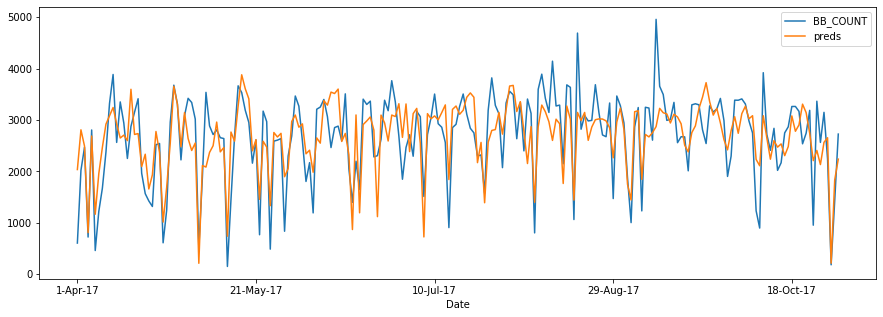

In [29]:
data.plot(x = 'Date', y = ['BB_COUNT', 'preds'], figsize=(15,5))

#### As we can see from above plot the model has performed well in predicting the BB_COUNT column.